# Level1: Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.datasets import load_iris

from sklearn.tree import DecisionTreeClassifier

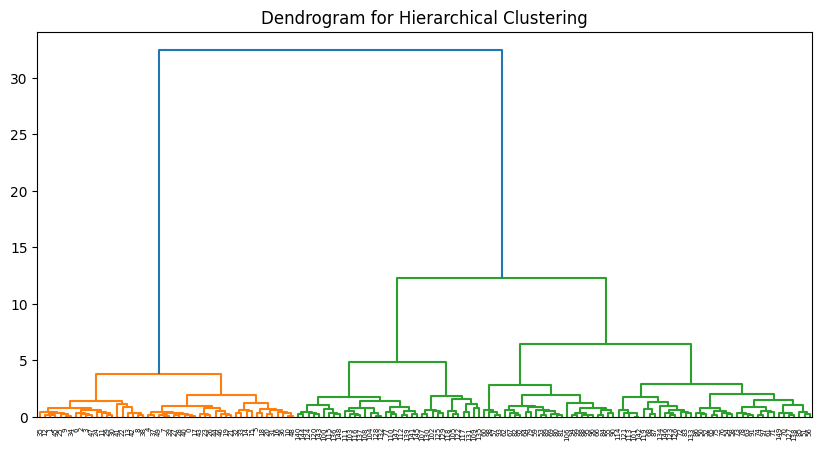

In [2]:
# 1. Hierarchical Clustering on Iris Dataset
df_iris = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)

linkage_matrix = linkage(df_iris, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)

plt.title("Dendrogram for Hierarchical Clustering")
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


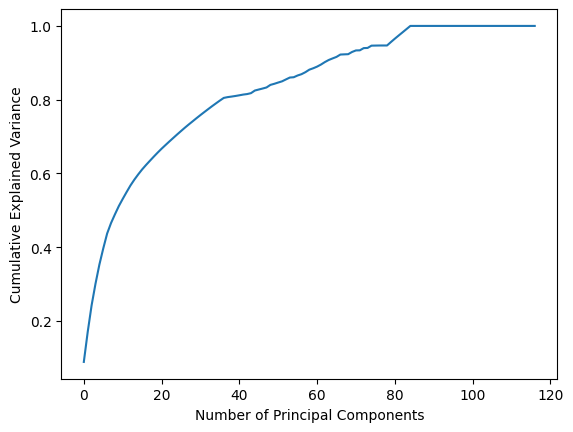

In [10]:
# 2. PCA on Mushroom Dataset
try:
    dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
    column_names = ["class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", "ring-number", "ring-type", "spore-print-color", "population", "habitat"]
    df_mushroom = pd.read_csv(dataset_url, names=column_names)
    X_mushroom = pd.get_dummies(df_mushroom.drop('class', axis=1))
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_mushroom)
    cov_matrix = np.cov(X_scaled.T)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    explained_variance = eigenvalues / np.sum(eigenvalues)
    cumulative_variance = np.cumsum(explained_variance)
    k = np.argmax(cumulative_variance >= 0.95) + 1  # Retaining 95% variance
    pca = PCA(n_components=k)
    X_pca = pca.fit_transform(X_scaled)
    plt.plot(cumulative_variance)
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Cumulative Explained Variance")
    plt.show()
except Exception as e:
    print(f"Error loading mushroom dataset: {e}")

In [8]:
# 3. Random Forest on Bill Authentication Dataset
try:
    df_bill = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt", names=["Variance", "Skewness", "Curtosis", "Entropy", "Class"])
    X_bill = df_bill.drop('Class', axis=1)
    y_bill = df_bill['Class']
    X_train, X_test, y_train, y_test = train_test_split(X_bill, y_bill, test_size=0.2, random_state=42)

    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_test)

    print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
except FileNotFoundError:
    print("Error: bill_authentication.csv not found. Please provide the dataset.")

Random Forest Accuracy: 0.9927272727272727
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [5]:
# 4. AdaBoost for Flower Species Classification
X_train, X_test, y_train, y_test = train_test_split(load_iris().data, load_iris().target, test_size=0.2, random_state=1)

adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2), n_estimators=50, random_state=1)
adaboost.fit(X_train, y_train)

y_pred = adaboost.predict(X_test)

print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

AdaBoost Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [6]:
# 5. Comparison of Classification Algorithms
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "AdaBoost": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Decision Tree Accuracy: 0.9667
Random Forest Accuracy: 0.9667
AdaBoost Accuracy: 0.9667
